# Case Study: Auto-Encoders in Dimensionality Reduction

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/dimension.png?raw=true" width="500" height = "250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Auto-Encoders-in-Dimensionality-Reduction" data-toc-modified-id="Case-Study:-Auto-Encoders-in-Dimensionality-Reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Auto-Encoders in Dimensionality Reduction</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Dataset-Creation-and-Preprocessing" data-toc-modified-id="Dataset-Creation-and-Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dataset Creation and Preprocessing</a></span></li><li><span><a href="#Baseline-Model-Creation" data-toc-modified-id="Baseline-Model-Creation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Baseline Model Creation</a></span></li><li><span><a href="#Auto-Encoder-Model-Training" data-toc-modified-id="Auto-Encoder-Model-Training-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Auto-Encoder Model Training</a></span></li><li><span><a href="#Reducing-Dimensionality-with-Auto-Encoder" data-toc-modified-id="Reducing-Dimensionality-with-Auto-Encoder-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reducing Dimensionality with Auto-Encoder</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conlusion" data-toc-modified-id="Conlusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conlusion</a></span></li></ul></div>

# Introduction

In this project, Auto-Encoders and Principal Component Analysis will be implemented in a sample dataset to check their efficiency when it comes to dimensionality reduction by comparing them in terms of visualization and silhouette score.

# Review

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/PCA_vs_Linear_Autoencoder.png" width="500" height = "250" />

In statistics, **principal component analysis** (PCA) is a method to project data in a higher dimensional space into a lower dimensional space by maximizing the variance of each dimension. Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components.

<img src="https://www.researchgate.net/publication/318204554/figure/fig1/AS:512595149770752@1499223615487/Autoencoder-architecture.png" width="500" height = "250"  />

An **autoencoder** is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learnt, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input

**Silhouette** refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

**Source:** Wikipedia


# Libraries and Data Importation

In [1]:
# Import librares
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Set theme
plt.style.use('ggplot')

# Set plot function
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# Assign colors
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

# Dataset Creation and Preprocessing

In [4]:
# Import library
from sklearn.datasets import make_blobs

# Create dataset
X, y = make_blobs(n_features=50, centers=20, n_samples=20000, cluster_std=0.2, 
                  random_state=17, center_box=[-1, 1])

In [20]:
# Check data
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
# Import library
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)

# Import library
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Model Creation

In [7]:
# Import library
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_train)

# Create label
res_pca = pca.transform(X_test)

In [8]:
# Check shape
res_pca.shape

(2000, 2)

In [9]:
# Create label
unique_labels = np.unique(y_test)

Text(0.5, 1.0, 'PCA Results')

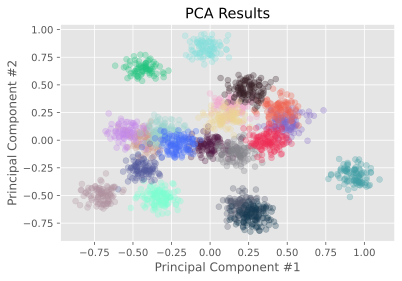

In [10]:
# Create function
for index, unique_label in enumerate(unique_labels):
    
    # Get only the unique labels
    X_data = res_pca[y_test==unique_label]
    
    # Plot the data
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=cols[index])

# Add labels in plot
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

# Auto-Encoder Model Training

In [11]:
# Import library
from sklearn.neural_network import MLPRegressor

# Create model
autoencoder = MLPRegressor(alpha=1e-15, 
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50), 
                           random_state=1, max_iter=20000)

# Fit the model
autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

# Reducing Dimensionality with Auto-Encoder

In [12]:
# Create label for weights
W = autoencoder.coefs_

# Create label for biases
biases = autoencoder.intercepts_

In [13]:
# Take only the weights in encoding phase
encoder_weights = W[0:4]

# Take only the biases in encoding phase
encoder_biases = biases[0:4]

In [14]:
# Create function
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b 
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae
   
# Create label for stored function
res_ae = encoder(encoder_weights, encoder_biases, X_test)

In [21]:
# Check shape
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

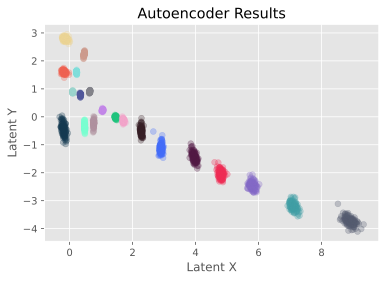

In [15]:
# Create label
unique_labels = np.unique(y_test)

# Create loop function
for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

# Add labesl in plot
plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

# Model Evaluation

In [16]:
# Import library
from sklearn.metrics import mean_squared_error, silhouette_score

# Check silhouette score
silhouette_score(X_train, y_train)

0.6109772034818249

In [17]:
# Check silhouette score in PCA
silhouette_score(res_pca, y_test)

0.36787481315747816

In [18]:
# Check silhouette score in AE
silhouette_score(res_ae, y_test)

0.8074659601962659

# Conlusion

Auto-Encoders outperform Principal Component Analysis when it comes to dimensionality reduction by just observing their visualization and silhouette score.

Autoencoders are really cool and powerful. It can encode data into lower dimensional space, like in this experiment, and find better clusters than initially created, which is quite an amazing result. It can also decode to create new datasets in a generative approach by sampling inside the latent space.